In [294]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df = pd.read_csv("phones_with_image_path.csv")
df.shape

(4056, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056 entries, 0 to 4055
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         4056 non-null   object 
 1   link                         4056 non-null   object 
 2   price                        4056 non-null   float64
 3   rating                       4056 non-null   float64
 4   spec_score                   4056 non-null   int64  
 5   processor_brand              4056 non-null   object 
 6   processor_core               4056 non-null   object 
 7   clock_speed                  4056 non-null   float64
 8   has_ir                       4056 non-null   int64  
 9   has_nfc                      4056 non-null   int64  
 10  has_5g                       4056 non-null   int64  
 11  ram_gb                       4056 non-null   float64
 12  rom_gb                       4056 non-null   float64
 13  brand             

In [7]:
total_phones = df.shape[0]
total_brands = df['brand'].nunique()
total_phones, total_brands

(4056, 41)

In [12]:
foldable_phones = df[df['foldable_display'] == 1].shape[0]
min_price = df['price'].min()
max_price = df['price'].max()
min_display_size = df['screen_size_inch'].min()
max_display_size = df['screen_size_inch'].max()
min_ram = df['ram_gb'].min()
max_ram = df['ram_gb'].max()

# Market and Brand Insights

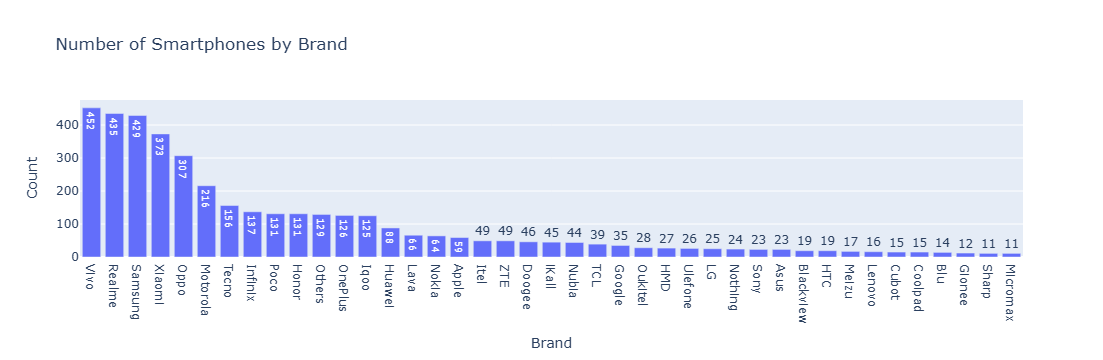

In [306]:
# most popular smartphone brands
brands_grouped = df.groupby("brand")
brand_count_df = brands_grouped.size().sort_values(ascending = False).reset_index()
brand_count_df.columns = ['Brand', 'Count']
fig = px.bar(
    brand_count_df,
    x = 'Brand',
    y = 'Count',
    title = 'Number of Smartphones by Brand',
    text = 'Count'
)
fig.show()

# Insights
# Vivo, Realme, and Samsung lead the smartphone market in this dataset, each with over 400 models, indicating their strong presence and diverse offerings across price segments.
# Chinese brands like Vivo, Realme, Xiaomi, Oppo, and Tecno dominate the top rankings, reflecting their aggressive product strategy and popularity in emerging markets like India.
# Brands like Apple, Google, and Sony, despite global recognition, have relatively fewer entries (under 60), suggesting a focused or premium-only portfolio in contrast to volume-driven competitors.
# The presence of many low-volume brands (e.g., iKall, Doogee, Coolpad, etc.) suggests a fragmented tail in the market, with several niche or budget manufacturers contributing small shares.

In [305]:
# top model by spec score
top_indices = brands_grouped['spec_score'].idxmax()
top_phones_df = df.loc[top_indices][['brand', 'name', 'price', 'ram_gb', 'rom_gb', 'screen_size_inch', 'spec_score', 'battery_capacity_mah', 'processor_brand', 'clock_speed']].reset_index(drop = True).set_index("brand")
top_phones_df

,name,price,ram_gb,rom_gb,screen_size_inch,spec_score,battery_capacity_mah,processor_brand,clock_speed
brand,,,,,,,,,
Apple,Apple iPhone 16 Pro Max (512GB),155900.0,8.0,512.0,6.90,91,4685.0,bionic,4.05
Asus,Asus ROG Phone 9 Pro,101990.0,16.0,512.0,6.78,93,5800.0,snapdragon,4.32
Blackview,Blackview BV9300 Pro,46500.0,12.0,256.0,6.70,88,15080.0,helio,2.20
Blu,BLU F91 5G,14990.0,8.0,128.0,6.80,85,5000.0,dimensity,2.40
Coolpad,Coolpad X100,15990.0,8.0,256.0,6.78,83,5000.0,helio,2.20
Cubot,Cubot KingKong X,58888.0,16.0,256.0,6.58,90,10200.0,dimensity,2.60
Doogee,Doogee V40 Pro,41990.0,16.0,512.0,6.78,95,8680.0,dimensity,2.50
Gionee,Gionee M30,14999.0,8.0,128.0,6.00,72,10000.0,helio,2.00
Google,Google Pixel 9 Pro XL (16GB RAM + 512GB),129999.0,16.0,512.0,6.80,93,5060.0,tensor,3.10


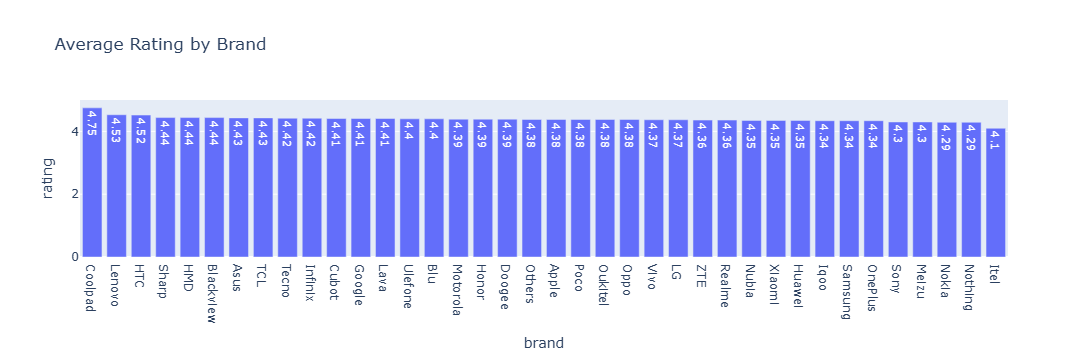

In [46]:
# average rating by brand after filtering by average spec score
avg_rating_df = df[df['spec_score'] > df['spec_score'].mean()].groupby("brand")['rating'].mean().sort_values(ascending = False).reset_index()
avg_rating_df['rating'] = avg_rating_df['rating'].round(2)
fig = px.bar(
    avg_rating_df,
    x = 'brand',
    y = 'rating',
    title = 'Average Rating by Brand',
    text = 'rating'
)
fig.show()

# Insights
# Coolpad, Lenovo, and HTC lead in user satisfaction, each with average ratings above 4.5.
# Popular brands like Samsung, OnePlus, and Sony have slightly lower ratings (~4.3–4.34), indicating strong competition from lesser-known brands.
# Itel has the lowest average rating (4.1), suggesting possible concerns with quality or user experience.

In [115]:
# brand comparison
def compare_brands(brand1, brand2):
    brand1_df = brands_grouped.get_group(brand1).copy()
    brand2_df = brands_grouped.get_group(brand2).copy()
    brand1_df['price_to_performance'] = (1000 * brand1_df['spec_score']) / brand1_df['price']
    brand2_df['price_to_performance'] = (1000 * brand2_df['spec_score']) / brand2_df['price']

    total1 = brand1_df.shape[0]
    avg_price1 = "Rs " + str(brand1_df['price'].mean().round(2))
    avg_rating1 = brand1_df['rating'].mean().round(2)
    avg_spec_score1 = brand1_df['spec_score'].mean().round(2)
    most_expensive1 = brand1_df[brand1_df['price'] == brand1_df['price'].max()]['name'] + " (Rs " + str(brand1_df['price'].max()) + ")"
    most_expensive1 = most_expensive1.head(1).values[0]
    highest_spec_score1 = brand1_df[brand1_df['spec_score'] == brand1_df['spec_score'].max()]['name'] + " (Spec Score =  " + str(brand1_df['spec_score'].max()) + ")"
    highest_spec_score1 = highest_spec_score1.head(1).values[0]
    avg_price_to_performance_1 = brand1_df['price_to_performance'].mean().round(2)

    total2 = brand2_df.shape[0]
    avg_price2 = "Rs " + str(brand2_df['price'].mean().round(2))
    avg_rating2 = brand2_df['rating'].mean().round(2)
    avg_spec_score2 = brand2_df['spec_score'].mean().round(2)
    most_expensive2 = brand2_df[brand2_df['price'] == brand2_df['price'].max()]['name'] + " (Rs " + str(brand2_df['price'].max()) + ")"
    most_expensive2 = most_expensive2.head(1).values[0]
    highest_spec_score2 = brand2_df[brand2_df['spec_score'] == brand2_df['spec_score'].max()]['name'] + " (Spec Score =  " + str(brand2_df['spec_score'].max()) + ")"
    highest_spec_score2 = highest_spec_score2.head(1).values[0]
    avg_price_to_performance_2 = brand2_df['price_to_performance'].mean().round(2)

    comparison_df = pd.DataFrame({
        brand1 : [total1, avg_price1, avg_rating1, avg_spec_score1, most_expensive1, highest_spec_score1, avg_price_to_performance_1],
        brand2 : [total2, avg_price2, avg_rating2,  avg_spec_score2, most_expensive2, highest_spec_score2, avg_price_to_performance_2]
    },index=[
        "Total Models",
        "Average Price",
        "Average Rating",
        "Average Spec Score",
        "Most Expensive Model",
        "Highest Spec Score Model",
        "Average Price-to-Performance (per ₹1000)"
    ])
    return comparison_df

In [116]:
compare_brands("Apple", "Samsung")

,Apple,Samsung
Total Models,59,429
Average Price,Rs 105540.03,Rs 32331.62
Average Rating,4.37,4.32
Average Spec Score,84.08,78.68
Most Expensive Model,Apple iPhone 18 Pro Max (Rs 179900.0),Samsung W25 (Rs 199990.0)
Highest Spec Score Model,Apple iPhone 16 Pro Max (512GB) (Spec Score = ...,Samsung W25 (Spec Score = 97)
Average Price-to-Performance (per ₹1000),0.91,4.24


# Feature Distribution and Trends

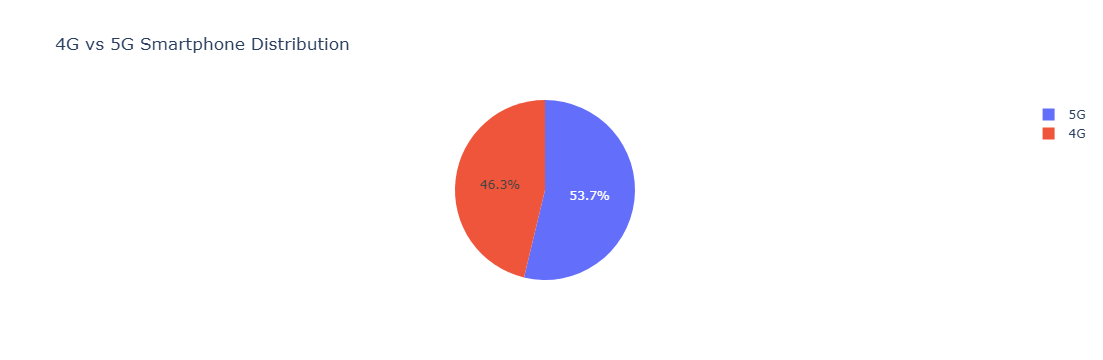

In [131]:
# 4G vs 5G Smartphone Distribution
connectivity_df = df.groupby("has_5g").size().reset_index().set_index("has_5g")
connectivity_df.index = ['4G', '5G']
connectivity_df = connectivity_df.reset_index()
connectivity_df.columns = ['Network', 'Total Phones']
fig = px.pie(
    connectivity_df,
    values = 'Total Phones',
    names = 'Network',
    title='4G vs 5G Smartphone Distribution'
)
fig.show()

# Insights
# 5G smartphones lead with a 53.7% share of the market.
# 4G smartphones still hold a strong presence, making up 46.3% of the total.

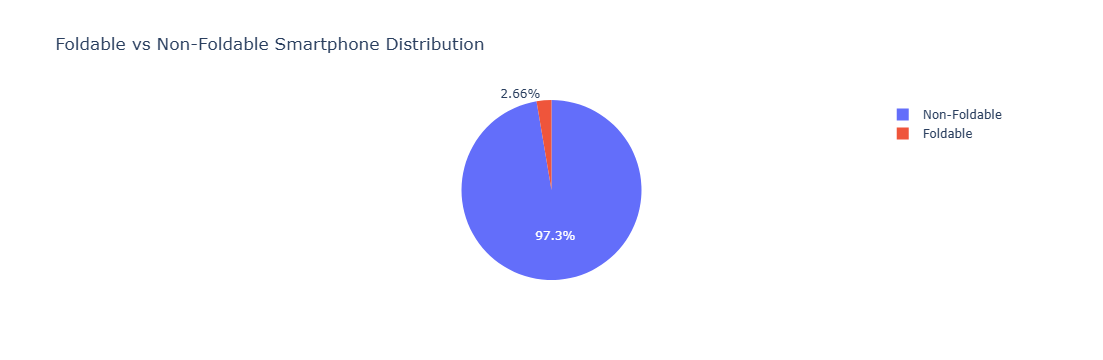

In [137]:
# foldable vs non foldable phones
foldable_dist_df = df.groupby("foldable_display").size().reset_index().set_index("foldable_display")
foldable_dist_df.index = ['Non-Foldable', 'Foldable']
foldable_dist_df = foldable_dist_df.reset_index()
foldable_dist_df.columns = ['Foldability', 'Total Phones']
fig = px.pie(
    foldable_dist_df,
    values = 'Total Phones',
    names = 'Foldability',
    title='Foldable vs Non-Foldable Smartphone Distribution'
)
fig.show()

# Insights
# Non-foldable smartphones dominate the market with a huge 97.3% share.
# Foldable phones are very rare, making up only 2.66% of the total.

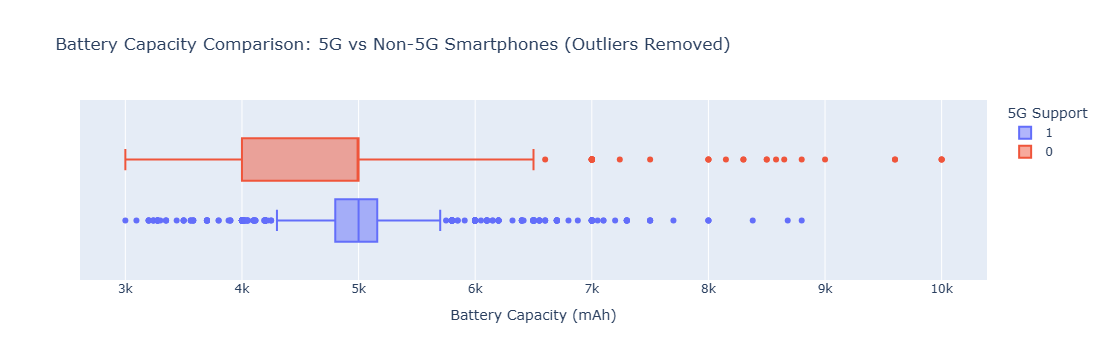

In [166]:
# Battery Capacity Comparison: 5G vs Non-5G Smartphones

# filtering out extreme outliers
filtered_df = df[df['battery_capacity_mah'] <= 10000]
fig = px.box(
    filtered_df,
    x = 'battery_capacity_mah',
    color = 'has_5g',
    labels = {"has_5g" : "5G Support", "battery_capacity_mah" : "Battery Capacity (mAh)"},
    title = "Battery Capacity Comparison: 5G vs Non-5G Smartphones (Outliers Removed)"
)
fig.show()

# Insights
# Non-5G smartphones generally have a wider range and higher median battery capacity compared to 5G phones.
# 5G phones tend to cluster around 5000 mAh, indicating more standardization.
# Outliers are more frequent in non-5G models, including phones with very high battery capacities (7000–10000 mAh).

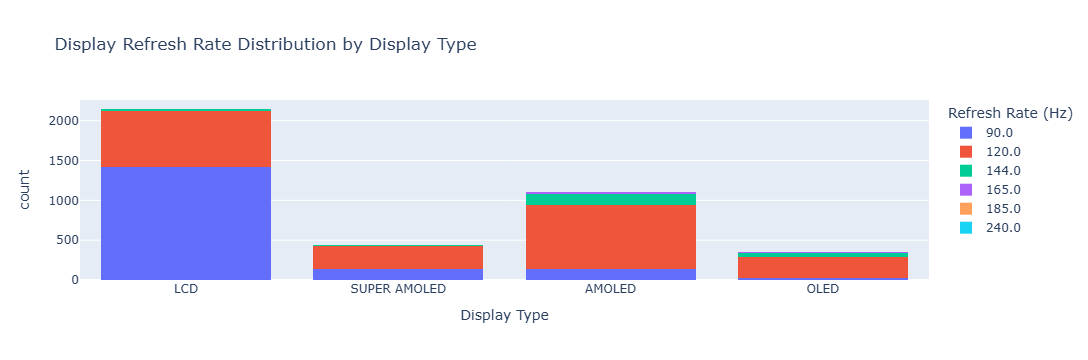

In [203]:
# Display Refresh Rate Distribution by Display Type
temp_df = df[df['screen_type'] != 'OTHER']
fig = px.histogram(
    temp_df,
    x = 'screen_type',
    color = 'display_refresh_rate',
    category_orders = {"display_refresh_rate" : sorted(temp_df['display_refresh_rate'].unique())},
    labels = {"screen_type" : "Display Type", "display_refresh_rate" : "Refresh Rate (Hz)"},
    barmode = 'stack',
    title = 'Display Refresh Rate Distribution by Display Type'
)
fig.show()

# Insights
# LCD displays are the most common and are primarily paired with 90Hz and 120Hz refresh rates, 90Hz being the most dominant.
# AMOLED and Super AMOLED displays are heavily dominated by 120Hz, indicating a strong preference for smoother visuals in these premium screens.
# While higher refresh rates like 144Hz, 165Hz, and even 240Hz are present, they are relatively rare and mainly appear with AMOLED/OLED panels.
# OLED displays are the least common but still support a variety of refresh rates, showcasing their high-end nature.

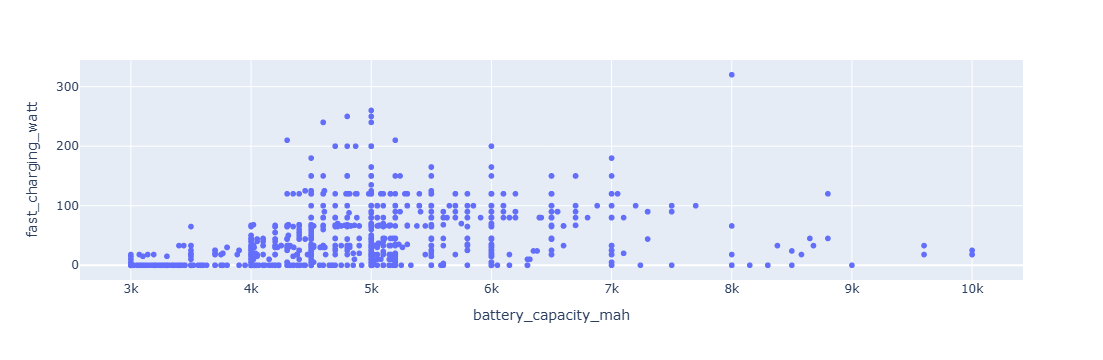

In [206]:
# battery capacity vs fast charging watt
fig = px.scatter(
    df[df['battery_capacity_mah'] <= 10000],
    x = 'battery_capacity_mah',
    y = 'fast_charging_watt'
)
fig.show()

# Insights
# No Strong Correlation Between Battery Size and Fast Charging Wattage.
# Our analysis shows that smartphones with similar battery capacities can have drastically different fast charging speeds. This suggests that fast 
# charging capability is not directly dependent on battery size, but likely influenced by brand priorities, price segments, or internal hardware limits.

# Price Analysis & Comparisons

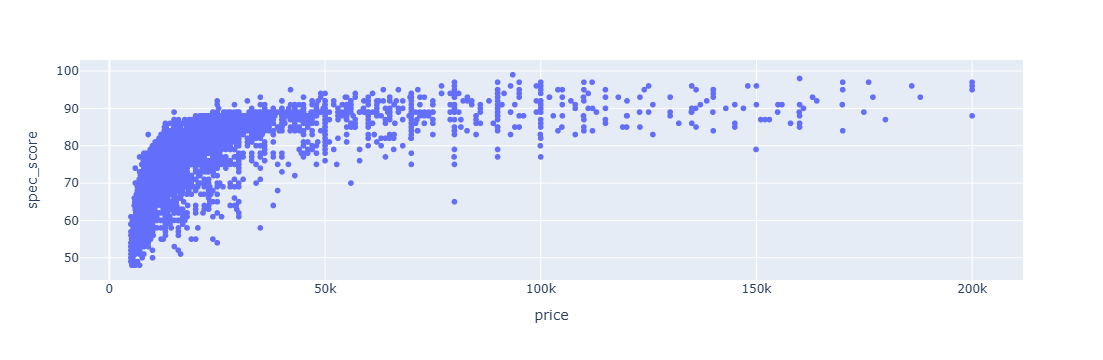

In [215]:
# price vs spec score
fig = px.scatter(
    df,
    x = 'price',
    y = 'spec_score'
)
fig.show()

# Insights
# Under ₹30,000, there's no strong correlation between price and spec score — some budget phones offer great value, while others underperform for their price.
# Spec score increases quickly as price increases from low to mid-range (up to ₹50,000), showing that spending more gives you better overall features early on.
# After a point (around ₹50,000+), the spec score starts to level off, meaning paying more doesn't always give much better features.
# Most smartphones with very high prices (₹100K+) have scores between 90–100, but some cheaper phones also reach high scores, showing there are value-for-money options.
# A few phones have lower spec scores despite high prices, which could be older models or phones with niche features not captured by spec_score.

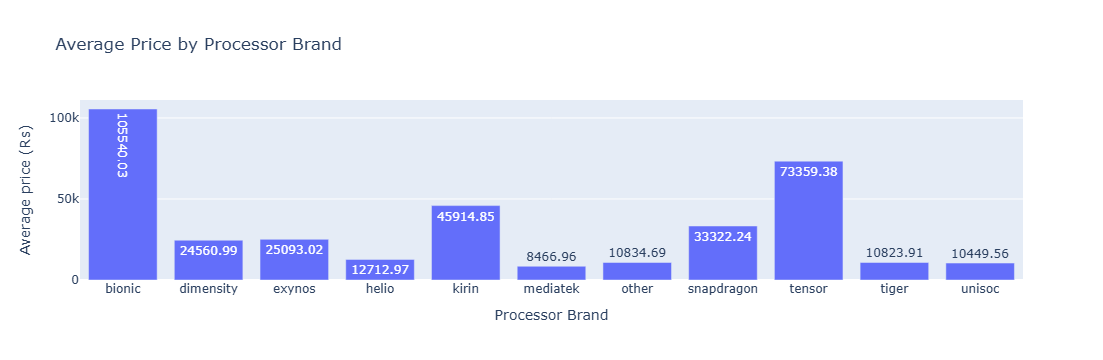

In [221]:
# Average price by processor brand
avg_price_processor_df = df.groupby("processor_brand")['price'].mean().reset_index()
avg_price_processor_df['price'] = avg_price_processor_df['price'].round(2)
fig = px.bar(
    avg_price_processor_df,
    x = 'processor_brand',
    y = 'price',
    text = 'price',
    labels = {"processor_brand" : "Processor Brand", "price" : "Average price (Rs)"},
    title = "Average Price by Processor Brand"
)
fig.show()

# Insights
# Bionic and Tensor processors are used in the most expensive phones on average.
# Snapdragon and Kirin phones are mid-range in price.
# Helio, Unisoc, and Mediatek are found in budget phones.
# There’s a big price gap between Bionic and most other processors as bionic processors are used in iPhones which are known for their high cost.

In [223]:
# price range distribution
bins = [0, 10000, 20000, 30000, 40000, 50000, float('inf')]
labels = ["<10k", "10k-20k", "20k-30k", "30k-40k", "40k-50k", ">50k"]
df['price_range'] = pd.cut(df['price'], bins = bins, labels = labels, right = False)

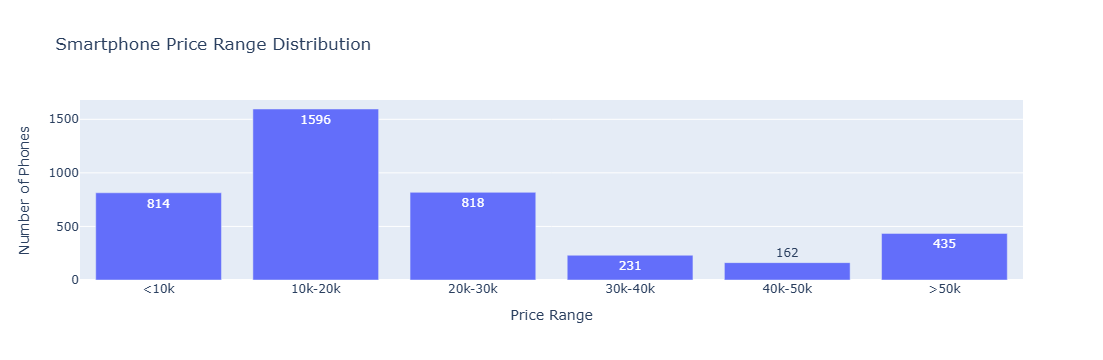

In [231]:
price_counts = df['price_range'].value_counts().sort_index()
fig = px.bar(
    x = price_counts.index,
    y = price_counts.values,
    text = price_counts.values,
    labels = {'x' : "Price Range", 'y' : "Number of Phones"},
    title = "Smartphone Price Range Distribution"
)
fig.show()

# Insights
# Most phones fall in the 10k–20k price range.
# 20k–30k and <10k ranges have a similar number of phones.
# Very few phones are priced between 30k–50k.
# Surprisingly, >50k has more phones than the 30k–50k range.

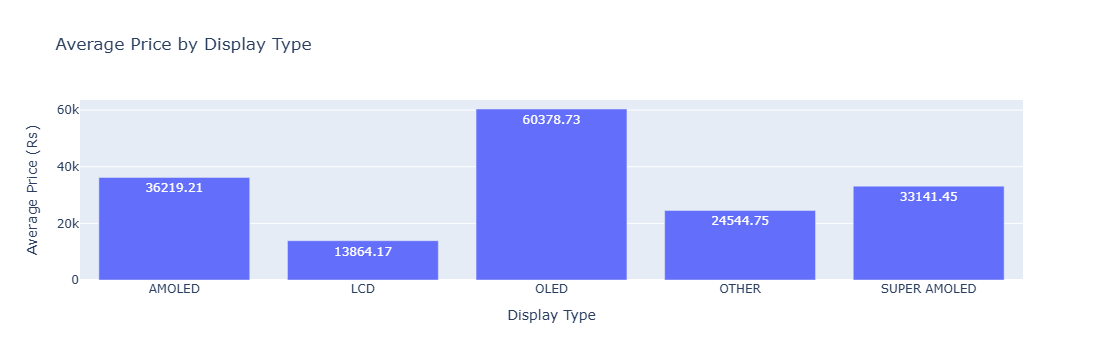

In [250]:
# Average Price by Display Type
screen_price_df = df.groupby("screen_type")['price'].mean().reset_index()
screen_price_df['price'] = screen_price_df['price'].round(2)
fig = px.bar(
    screen_price_df,
    x = 'screen_type',
    y = 'price',
    text = 'price',
    labels = {"screen_type" : "Display Type", "price" : "Average Price (Rs)"},
    title = "Average Price by Display Type"
)
fig.show()

# Insights
# OLED phones are the most expensive on average.
# LCD phones have the lowest average price.
# AMOLED and Super AMOLED phones cost more than LCD but less than OLED.
# Other display types fall in the mid-price range.

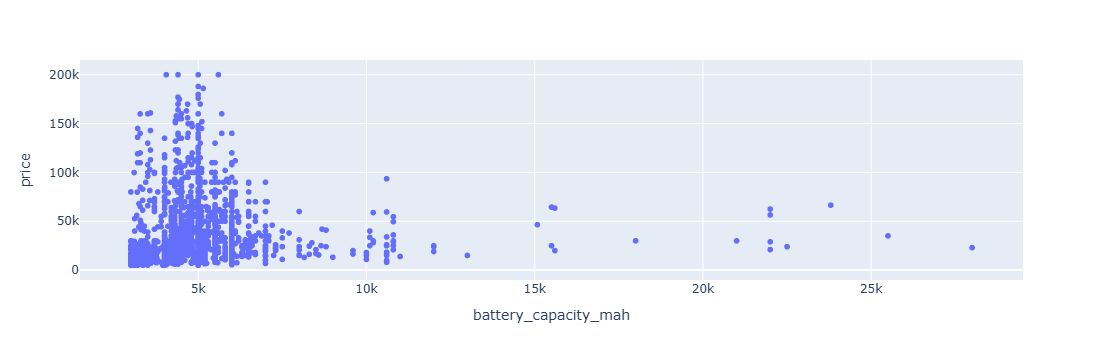

In [253]:
# price vs battery_capacity
fig = px.scatter(
    df,
    x = 'battery_capacity_mah',
    y = 'price'
)
fig.show()
# Insights
# Most smartphones have battery capacities between 3000 and 7000 mAh.
# There's no clear link between higher battery capacity and higher price.
# Some low-priced phones even offer very high battery capacities (above 10,000 mAh).
# Premium phones often focus on other features instead of just battery size.

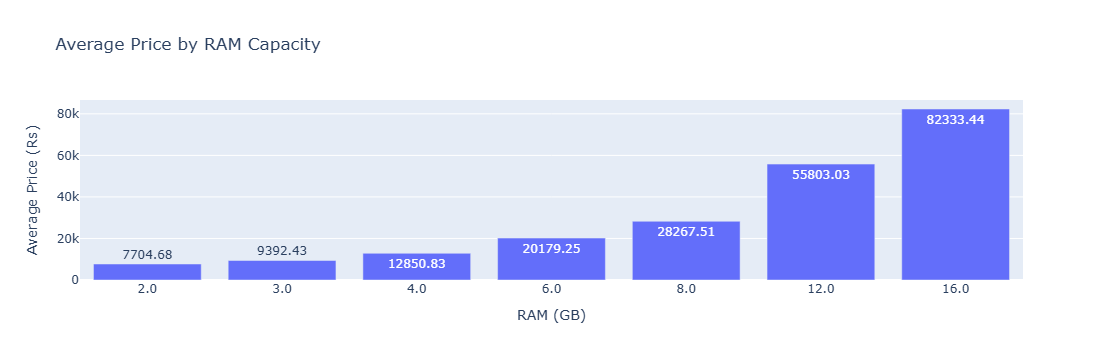

In [329]:
# Average Price by RAM
ram_price_df = df.groupby("ram_gb")['price'].mean().reset_index()
ram_price_df['ram_gb'] = ram_price_df['ram_gb'].astype(str)
ram_price_df['price'] = ram_price_df['price'].round(2)
fig = px.bar(
    ram_price_df,
    x = 'ram_gb',
    y = 'price',
    text = 'price',
    labels = {"ram_gb" : "RAM (GB)", "price" : "Average Price (Rs)"},
    title = "Average Price by RAM Capacity"
)

fig.show()

# Insights
# Average price increases steadily with higher RAM.
# Phones with 16 GB RAM are the most expensive on average.
# There's a sharp price jump from 8 GB to 12 GB RAM.
# Budget phones typically have 2–4 GB RAM.

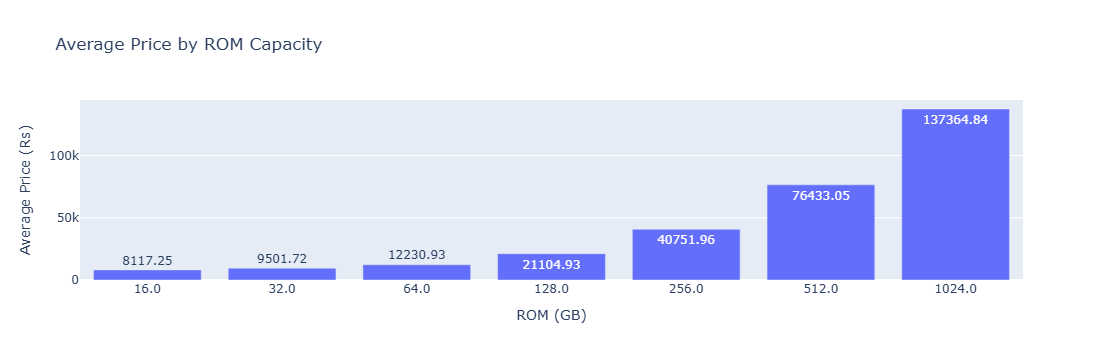

In [252]:
# Average Price by ROM
rom_price_df = df.groupby("rom_gb")['price'].mean().reset_index()
rom_price_df['rom_gb'] = rom_price_df['rom_gb'].astype(str)
rom_price_df['price'] = rom_price_df['price'].round(2)
fig = px.bar(
    rom_price_df,
    x = 'rom_gb',
    y = 'price',
    text = 'price',
    labels = {"rom_gb" : "ROM (GB)", "price" : "Average Price (Rs)"},
    title = "Average Price by ROM Capacity"
)

fig.show()

# Insights
# Higher ROM (storage) clearly leads to higher phone prices.
# Prices rise sharply from 256 GB onward, especially at 512 GB and 1 TB.
# Phones with 16–64 GB ROM fall into the budget category.
# 1 TB phones are rare and highly premium.

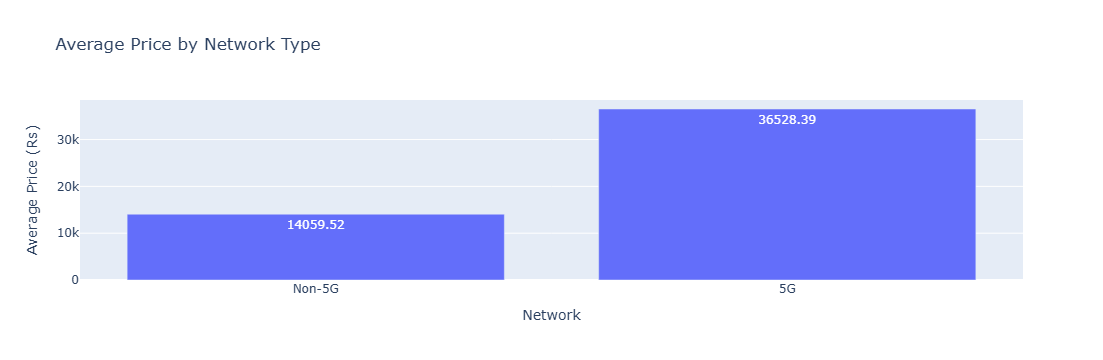

In [323]:
# Average Price by Network Type
temp_df = df.groupby("has_5g")['price'].mean().reset_index().set_index("has_5g")
temp_df['price'] = temp_df['price'].round(2)
temp_df.index = ['Non-5G', '5G']
temp_df = temp_df.reset_index()
temp_df.columns = ['Network', 'Average Price (Rs)']
fig = px.bar(
    temp_df,
    x = 'Network',
    y = 'Average Price (Rs)',
    text = 'Average Price (Rs)',
    title = 'Average Price by Network Type'
)
fig.show()

# Insights
# 5G phones are significantly more expensive, with an average price of ₹36,528 compared to ₹14,059 for non-5G phones.
# Network type is a strong indicator of pricing tier — 5G support clearly aligns with premium devices.

# Camera, RAM and Processor Core Insights

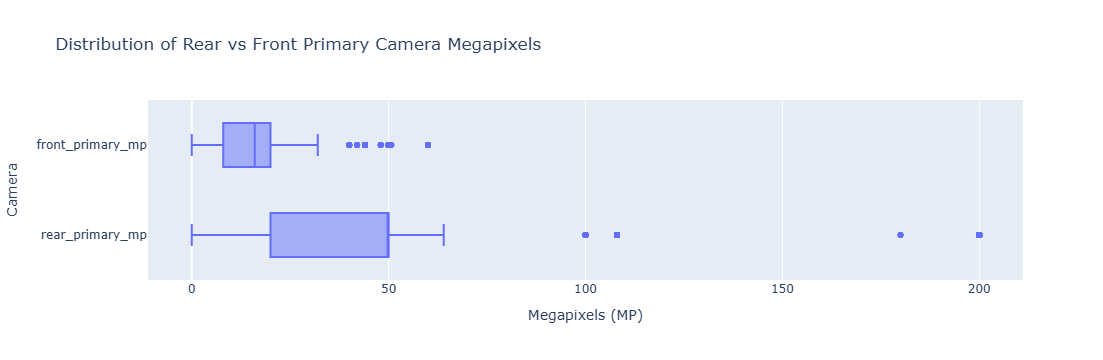

In [260]:
# Distribution of Rear vs Front Primary Camera Megapixels
fig = px.box(
    df.melt(value_vars = ['rear_primary_mp', 'front_primary_mp'], var_name = "Camera Type", value_name = "Megapixels"),
    x = "Megapixels",
    y = "Camera Type",
    labels = {"Megapixels" : "Megapixels (MP)", "Camera Type" : "Camera"},
    title = "Distribution of Rear vs Front Primary Camera Megapixels"
)
fig.show()

# Insights
# Rear cameras generally have much higher megapixels than front cameras.
# Most front cameras are between 8–32 MP, while rear cameras range wider, up to 200 MP.
# A few phones have extremely high rear camera megapixels, acting as outliers.
# Front camera specs are more consistent across phones than rear cameras.

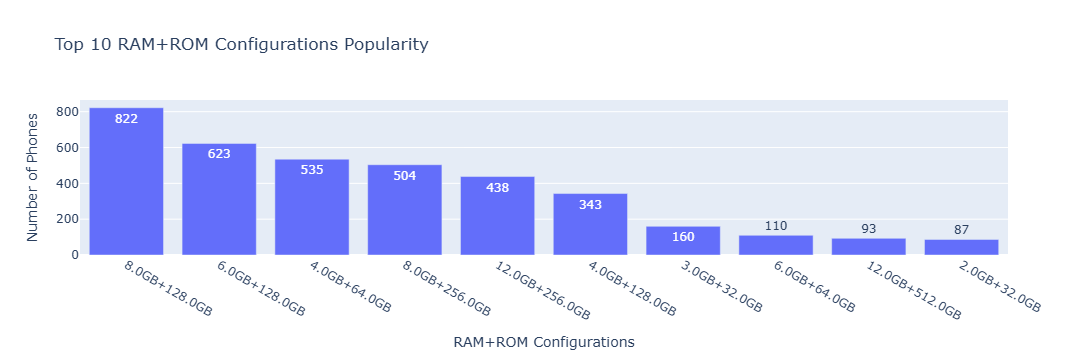

In [269]:
# RAM/ROM Configurations Popularity
df["ram_rom_combo"] = df['ram_gb'].astype(str) + "GB" + "+" + df['rom_gb'].astype(str) + "GB"
combo_counts = df['ram_rom_combo'].value_counts().head(10).reset_index()
fig = px.bar(
    combo_counts,
    x = 'ram_rom_combo',
    y = 'count',
    text = 'count',
    labels = {"ram_rom_combo" : "RAM+ROM Configurations", "count" : "Number of Phones"},
    title = "Top 10 RAM+ROM Configurations Popularity"
)
fig.show()

# Insights
# The most popular configuration is 8GB RAM + 128GB ROM, widely used across devices.
# Mid-range setups like 6GB/128GB and 4GB/64GB are also very common.
# High-end combos (12GB+256GB) are popular but less frequent.
# Entry-level configs like 2GB/32GB appear rarely in the dataset.

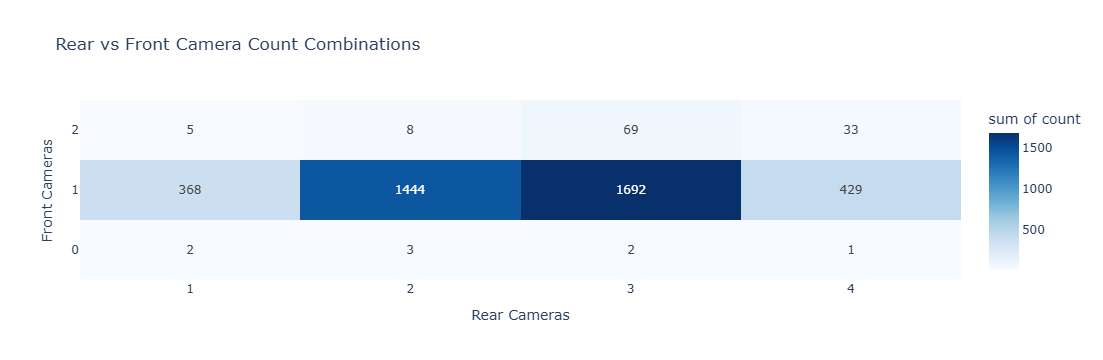

In [279]:
#  Number of Rear Cameras vs. Front Cameras
temp_df = df.copy()
temp_df['num_rear_cameras'] = temp_df['num_rear_cameras'].astype(int).astype(str)
temp_df['num_front_cameras'] = temp_df['num_front_cameras'].astype(int).astype(str)

camera_combo = temp_df.groupby(['num_rear_cameras', 'num_front_cameras']).size().reset_index(name = 'count')

fig = px.density_heatmap(
    camera_combo,
    x = 'num_rear_cameras',
    y = 'num_front_cameras',
    z = 'count',
    color_continuous_scale = 'Blues',
    text_auto = True,
    labels = {"num_rear_cameras" : "Rear Cameras", "num_front_cameras" : "Front Cameras"},
    title = 'Rear vs Front Camera Count Combinations'
)

fig.show()

# Insights
# Most smartphones have 1 front camera paired with 2 or 3 rear cameras.
# Very few devices offer dual front cameras.
# Having 4 rear cameras is less common but still notable.
# Phones with 0 front cameras are rare in the dataset.

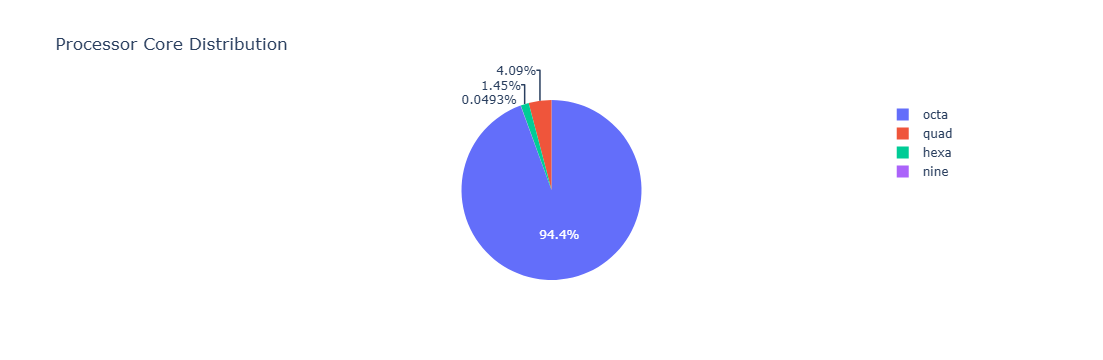

In [284]:
processor_count = df.groupby("processor_core").size().reset_index(name = "count")
fig = px.pie(
    processor_count,
    values = "count",
    names = "processor_core",
    title = "Processor Core Distribution"
)
fig.show()

# Insights
# Octa-core processors dominate the market, powering 94.4% of the phones.
# Other core types (quad, hexa, nine) are extremely rare, together making up just 5.6%.

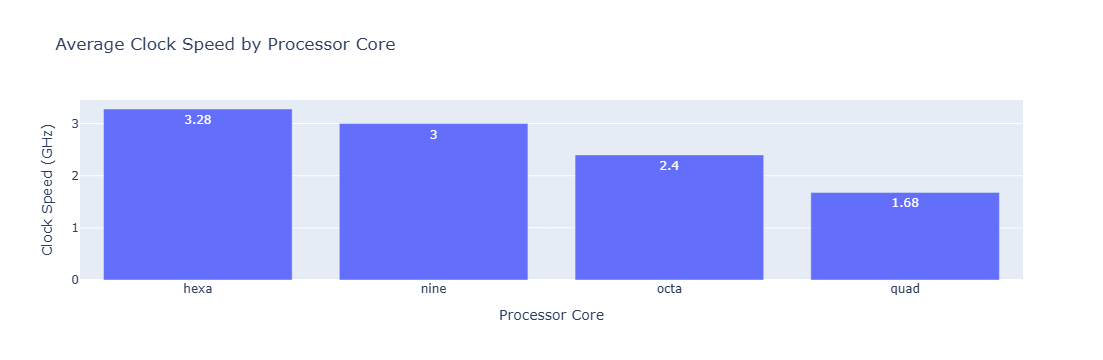

In [289]:
# Average clock speed by processor core
processor_clock_df = df.groupby("processor_core")['clock_speed'].mean().reset_index()
processor_clock_df['clock_speed'] = processor_clock_df['clock_speed'].round(2)
fig = px.bar(
    processor_clock_df,
    x = 'processor_core',
    y = 'clock_speed',
    text = 'clock_speed',
    labels = {"processor_core" : "Processor Core", "clock_speed" : "Clock Speed (GHz)"},
    title = "Average Clock Speed by Processor Core"
)
fig.show()

# Insights
# Hexa-core processors have the highest average clock speed at 3.28 GHz.
# Octa-core and nine-core are slower than Hexa-core at 2.4 GHz and 3.0 GHz, respectively.
# Quad-core chips are the slowest, averaging 1.68 GHz.
# More cores don’t always mean higher speed.

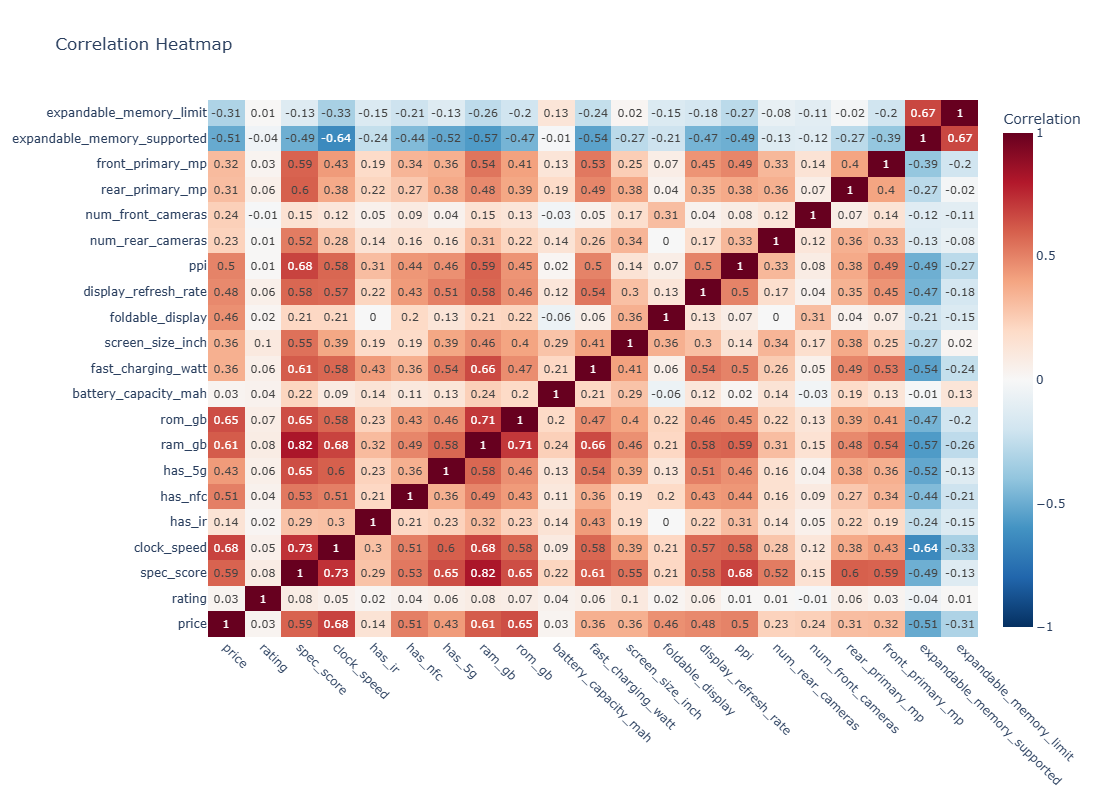

In [311]:
# Correlation heatmap
# Compute correlation matrix
corr_matrix = df.corr(numeric_only = True).round(2)

fig = go.Figure(data = go.Heatmap(
    x = corr_matrix.columns,
    y = corr_matrix.columns,
    z = corr_matrix.values,
    zmin = -1,
    zmax = 1,
    colorscale = 'RdBu_r',
    colorbar_title = 'Correlation',
    text = corr_matrix.values,
    texttemplate = "%{text}",
    hovertemplate = "Correlation between %{y} and %{x} : %{z}"
))

fig.update_layout(
    title = 'Correlation Heatmap',
    xaxis_tickangle = 45,
    width = 800,
    height = 800
)

fig.show()

In [ ]:
# Insights
# Price is positively correlated with spec score (0.59), RAM (0.61), and ROM (0.65) — better hardware strongly influences phone pricing.
# Clock speed also has strong positive correlation with spec score (0.73) and RAM (0.68) — faster processors often come with more RAM and better overall specs.
# Expandable memory support has a negative correlation with price (-0.51) — higher-end phones are less likely to support expandable storage.
# Spec score is a reliable summary metric — it correlates well with most performance indicators like RAM, ROM, clock speed, and even fast charging.
# Front and rear camera megapixels have very weak correlation with price — camera resolution alone doesn’t drive phone pricing.